In [111]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

In [112]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [113]:
url_json = "https://storage.googleapis.com/dqlab-dataset/covid19_worldwide_2020.json"
datasets = pd.read_json(url_json)

In [114]:
print("Dimensi Data: %d kolom dan %d baris.\n " %(datasets.shape[1], datasets.shape[0]))
print("Data teratas: \n", datasets.head())
print("Data terbawah: \n", datasets.tail())

Dimensi Data: 6 kolom dan 61900 baris.
 
Data teratas: 
         date  daily_confirmed_cases  daily_deaths  confirmed_cases  deaths  \
0 2020-03-20                      1             0                1       0   
1 2020-03-21                      0             0                1       0   
2 2020-03-22                      1             0                2       0   
3 2020-03-23                      0             0                2       0   
4 2020-03-24                      0             0                2       0   

  geo_id  
0     TD  
1     TD  
2     TD  
3     TD  
4     TD  
Data terbawah: 
             date  daily_confirmed_cases  daily_deaths  confirmed_cases  \
61895 2020-02-24                     57             1              691   
61896 2020-02-26                      0             1              691   
61897 2020-03-10                     -9             1              696   
61898 2020-02-20                     79             2              621   
61899 2020-02-29     

In [115]:
print("Informasi data frame awal")
datasets.info()
datasets.dtypes

Informasi data frame awal
<class 'pandas.core.frame.DataFrame'>
Index: 61900 entries, 0 to 61899
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   61900 non-null  datetime64[ns]
 1   daily_confirmed_cases  61900 non-null  int64         
 2   daily_deaths           61900 non-null  int64         
 3   confirmed_cases        61900 non-null  int64         
 4   deaths                 61900 non-null  int64         
 5   geo_id                 61625 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.3+ MB


date                     datetime64[ns]
daily_confirmed_cases             int64
daily_deaths                      int64
confirmed_cases                   int64
deaths                            int64
geo_id                           object
dtype: object

In [116]:
datasets = datasets.set_index("date").sort_index()
datasets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61900 entries, 2019-12-31 to 2020-12-14
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   daily_confirmed_cases  61900 non-null  int64 
 1   daily_deaths           61900 non-null  int64 
 2   confirmed_cases        61900 non-null  int64 
 3   deaths                 61900 non-null  int64 
 4   geo_id                 61625 non-null  object
dtypes: int64(4), object(1)
memory usage: 2.8+ MB


In [117]:
print("Jumlah missing value: \n")
print(datasets.isnull().sum())

Jumlah missing value: 

daily_confirmed_cases      0
daily_deaths               0
confirmed_cases            0
deaths                     0
geo_id                   275
dtype: int64


In [118]:
# MENGHAPUS DATA BARIS YANG KOSONG

datasets.dropna(inplace=True)
datasets.isnull().sum()

daily_confirmed_cases    0
daily_deaths             0
confirmed_cases          0
deaths                   0
geo_id                   0
dtype: int64

In [119]:
# MENGAMBIL DATA COUNTRIES

url_countries_json = "https://storage.googleapis.com/dqlab-dataset/country_details.json"
datasets_countries = pd.read_json(url_countries_json)
datasets_countries.head()

,geo_id,country_name
0,TD,Chad
1,CU,Cuba
2,FJ,Fiji
3,GU,Guam
4,IR,Iran


In [120]:
# RESET INDEX

datasets = datasets.reset_index()

In [121]:
df_covid = pd.merge(datasets, datasets_countries, on="geo_id", how="inner")

In [122]:
df_covid = df_covid.set_index("date")
df_covid.head()

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name
date,,,,,,
2019-12-31,0,0,0,0,IN,India
2019-12-31,0,0,0,0,IR,Iran
2019-12-31,0,0,0,0,PK,Pakistan
2019-12-31,0,0,0,0,AM,Armenia
2019-12-31,27,0,27,0,CN,China


In [123]:
# MENAMBAHKAN KOLOM FATALITY RATIO

df_covid["fatality_ratio"] = df_covid['deaths']/df_covid['confirmed_cases']
df_covid.head()

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name,fatality_ratio
date,,,,,,,
2019-12-31,0,0,0,0,IN,India,NaN
2019-12-31,0,0,0,0,IR,Iran,NaN
2019-12-31,0,0,0,0,PK,Pakistan,NaN
2019-12-31,0,0,0,0,AM,Armenia,NaN
2019-12-31,27,0,27,0,CN,China,0.0


In [124]:
# MENGHITUNG TOP 20 FATALITY RATIO

df_top_20_covid = df_covid.sort_values("fatality_ratio", ascending=False).head(20)
df_top_20_covid

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name,fatality_ratio
date,,,,,,,
2020-03-17,0,0,1,1,SD,Sudan,1.0
2020-03-13,1,1,1,1,GY,Guyana,1.0
2020-03-16,0,1,1,1,GT,Guatemala,1.0
2020-03-15,0,1,1,1,SD,Sudan,1.0
2020-02-20,2,2,2,2,IR,Iran,1.0
2020-03-16,0,0,1,1,SD,Sudan,1.0
2020-03-18,0,0,1,1,SD,Sudan,1.0
2020-03-21,0,0,2,1,SD,Sudan,0.5
2020-03-24,0,0,2,1,SD,Sudan,0.5


In [220]:
# MENAMPILKAN NEGARA DENGAN DAILY DEATHS TERBANYAK

df_top_daily_deaths = df_covid.copy()
df_top_daily_deaths = df_top_daily_deaths.loc[df_top_daily_deaths["deaths"] > 0].sort_values(by="date",ascending=False)
df_top_daily_deaths

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name,fatality_ratio
date,,,,,,,
2020-12-14,2138,40,571919,15886,CL,Chile,0.027777
2020-12-14,136,0,4030,71,BF,Burkina_Faso,0.017618
2020-12-14,0,0,148,4,AG,Antigua_and_Barbuda,0.027027
2020-12-14,1928,68,984973,36677,PE,Peru,0.037237
2020-12-14,3470,165,283870,7130,HU,Hungary,0.025117
...,...,...,...,...,...,...,...
2020-01-15,0,1,59,2,CN,China,0.033898
2020-01-14,0,0,59,1,CN,China,0.016949
2020-01-13,0,0,59,1,CN,China,0.016949


In [126]:
# MENAMPILKAN FATALITY RATIO TERBANYAK BULAN AGUSTUS
df_covid_agustus = df_covid.loc["2020-08"].groupby("country_name").sum()

df_covid_agustus['fatality_ratio'] = df_covid_agustus['deaths']/df_covid_agustus['confirmed_cases']

df_covid_agustus_top20 = df_covid_agustus.sort_values("fatality_ratio", ascending=False).head(20)
df_covid_agustus_top20

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,fatality_ratio
country_name,,,,,,
Yemen,227,77,57391,16441,YEYEYEYEYEYEYEYEYEYEYEYEYEYEYEYEYEYEYEYEYEYEYE...,0.286473
Italy,21060,345,7897945,1094804,ITITITITITITITITITITITITITITITITITITITITITITIT...,0.138619
France,91370,352,6834388,943004,FRFRFRFRFRFRFRFRFRFRFRFRFRFRFRFRFRFRFRFRFRFRFR...,0.137979
United_Kingdom,32166,330,9843011,1281831,UKUKUKUKUKUKUKUKUKUKUKUKUKUKUKUKUKUKUKUKUKUKUK...,0.130228
Belgium,15816,185,2431271,304102,BEBEBEBEBEBEBEBEBEBEBEBEBEBEBEBEBEBEBEBEBEBEBE...,0.125079
Hungary,1456,18,153086,18802,HUHUHUHUHUHUHUHUHUHUHUHUHUHUHUHUHUHUHUHUHUHUHU...,0.122820
Netherlands,16108,75,1925481,191217,NLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNL...,0.099309
Mexico,166047,18158,17473585,1731487,MXMXMXMXMXMXMXMXMXMXMXMXMXMXMXMXMXMXMXMXMXMXMX...,0.099092
Jersey,39,1,10995,975,JEJEJEJEJEJEJEJEJEJEJEJEJEJEJEJEJEJEJEJEJEJEJE...,0.088677


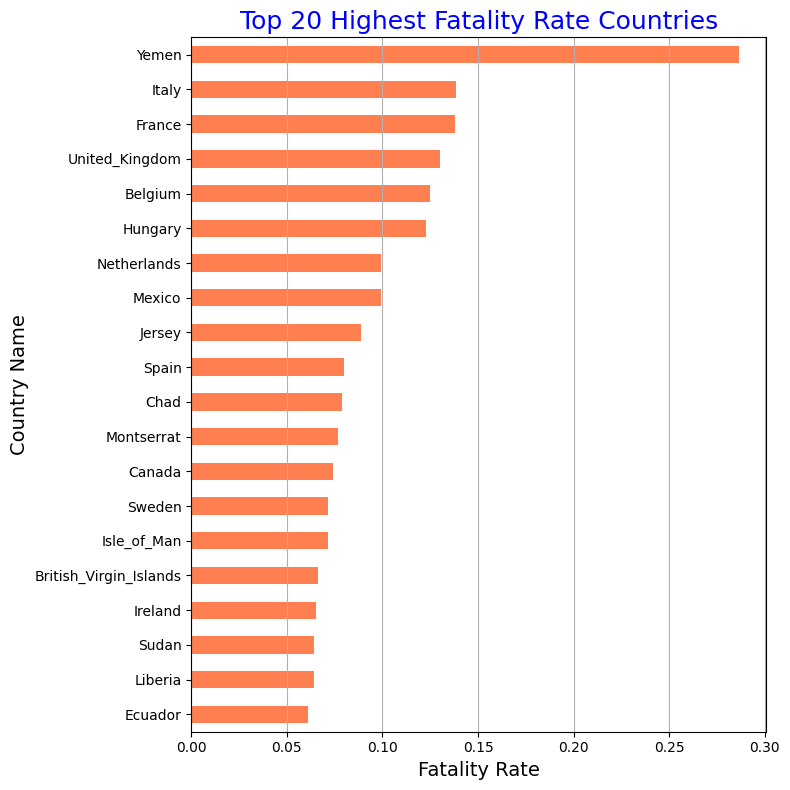

In [127]:
# VISUALISASI FATALITY RATIO

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
df_covid_agustus_top20["fatality_ratio"].sort_values(ascending=True).plot(kind="barh", color="coral")
plt.title("Top 20 Highest Fatality Rate Countries", fontsize=18, color="b")
plt.xlabel("Fatality Rate", fontsize=14)
plt.ylabel("Country Name", fontsize=14)
plt.grid(axis="x")
plt.tight_layout()
plt.show()

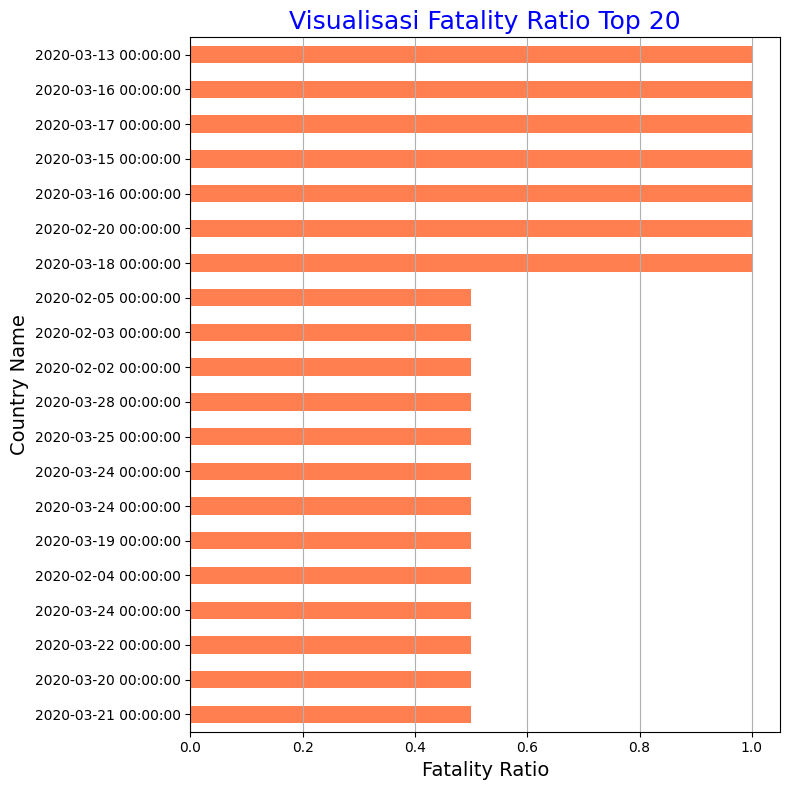

In [128]:
# VISUALISASI DATA ALL
df_covid1 = df_covid.copy()
df_covid1 = df_covid.set_index("country_name")
df_covid1 = df_covid.sort_values("fatality_ratio", ascending=False).head(20)

plt.figure(figsize=(8, 8))
df_covid1["fatality_ratio"].sort_values().plot(kind="barh", color="coral")
plt.title("Visualisasi Fatality Ratio Top 20", fontsize=18, color="b")
plt.xlabel("Fatality Ratio", fontsize=14)
plt.ylabel("Country Name", fontsize=14)
plt.grid(axis="x")
plt.tight_layout()

plt.show()

In [145]:
# MEMBANDINGKAN NEGARA INDONESIA DENGAN ASEAN

asean_country_id = ["ID", "MY", "SG", "TH", "VN"]
filter_list = [
    (df_covid["geo_id"]==country_id).to_numpy()
    for country_id in asean_country_id
]
filter_array = np.column_stack(filter_list).sum(axis=1, dtype="bool")

df_covid_asean = df_covid[filter_array].sort_index()

print("Cek nilai unik di kolom 'country_name':", df_covid_asean["country_name"].unique())
df_covid_asean.head()

Cek nilai unik di kolom 'country_name': ['Malaysia' 'Indonesia' 'Singapore' 'Thailand' 'Vietnam']


,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name,fatality_ratio
date,,,,,,,
2019-12-31,0,0,0,0,MY,Malaysia,NaN
2019-12-31,0,0,0,0,ID,Indonesia,NaN
2019-12-31,0,0,0,0,SG,Singapore,NaN
2019-12-31,0,0,0,0,TH,Thailand,NaN
2019-12-31,0,0,0,0,VN,Vietnam,NaN


In [130]:
df_covid_asean = df_covid.loc[
    df_covid['geo_id'].isin(asean_country_id)
].sort_index()

df_covid_asean.head()

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name,fatality_ratio
date,,,,,,,
2019-12-31,0,0,0,0,MY,Malaysia,NaN
2019-12-31,0,0,0,0,ID,Indonesia,NaN
2019-12-31,0,0,0,0,SG,Singapore,NaN
2019-12-31,0,0,0,0,TH,Thailand,NaN
2019-12-31,0,0,0,0,VN,Vietnam,NaN


In [132]:
# MENCARI KASUS PERTAMA DI NEGARA ASEAN

for country_id in asean_country_id:
    asean_country = df_covid_asean[df_covid_asean["geo_id"]==country_id] 
    first_case = asean_country[asean_country["confirmed_cases"]>0][["confirmed_cases","geo_id","country_name"]]
    print(first_case.head(1))

            confirmed_cases geo_id country_name
date                                           
2020-03-02                2     ID    Indonesia
            confirmed_cases geo_id country_name
date                                           
2020-01-25                3     MY     Malaysia
            confirmed_cases geo_id country_name
date                                           
2020-01-24                3     SG    Singapore
            confirmed_cases geo_id country_name
date                                           
2020-01-13                1     TH     Thailand
            confirmed_cases geo_id country_name
date                                           
2020-01-24                2     VN      Vietnam


In [223]:
# KEMATIAN PERTAMA DI ASEAN

for country_id in asean_country_id:
    asean_country = df_covid[df_covid["geo_id"] == country_id]
    first_case = asean_country[asean_country["deaths"] > 0] [["deaths","geo_id","country_name"]]
    print(first_case.head(1))

            daily_confirmed_cases  daily_deaths  confirmed_cases  deaths  \
date                                                                       
2019-12-31                      0             0                0       0   
2020-01-01                      0             0                0       0   
2020-01-02                      0             0                0       0   
2020-01-03                      0             0                0       0   
2020-01-04                      0             0                0       0   
...                           ...           ...              ...     ...   
2020-12-10                   6058           171           592900   18171   
2020-12-11                   6033           165           598933   18336   
2020-12-12                   6310           175           605243   18511   
2020-12-13                   6388           142           611631   18653   
2020-12-14                   6189           166           617820   18819   

           

In [232]:
# KASUS PERTAMA DI SETIAP NEGARA

for country_id in df_covid['geo_id'].unique():
    country = df_covid[df_covid['geo_id'] ==  country_id]
    first_case = country[country['confirmed_cases'] > 0][['confirmed_cases', 'geo_id', 'country_name']]
    first_case = first_case.sort_values(by="date", ascending=True)
    print(first_case.head(1))

            confirmed_cases geo_id country_name
date                                           
2020-01-30                1     IN        India
            confirmed_cases geo_id country_name
date                                           
2020-02-20                2     IR         Iran
            confirmed_cases geo_id country_name
date                                           
2020-02-27                2     PK     Pakistan
            confirmed_cases geo_id country_name
date                                           
2020-03-01                1     AM      Armenia
            confirmed_cases geo_id country_name
date                                           
2019-12-31               27     CN        China
            confirmed_cases geo_id country_name
date                                           
2020-02-29                1     AZ   Azerbaijan
            confirmed_cases geo_id country_name
date                                           
2020-02-26                1     DZ      

In [239]:
df_covid_dari_maret = df_covid_asean[df_covid_asean.index >= "2020-03-01"]
df_covid_dari_maret

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name,fatality_ratio
date,,,,,,,
2020-03-01,0,0,25,0,MY,Malaysia,0.000000
2020-03-01,0,1,42,1,TH,Thailand,0.023810
2020-03-01,0,0,16,0,VN,Vietnam,0.000000
2020-03-01,0,0,0,0,ID,Indonesia,NaN
2020-03-01,4,0,102,0,SG,Singapore,0.000000
...,...,...,...,...,...,...,...
2020-12-14,1229,4,83475,415,MY,Malaysia,0.004972
2020-12-14,6189,166,617820,18819,ID,Indonesia,0.030460
2020-12-14,7,0,58320,29,SG,Singapore,0.000497


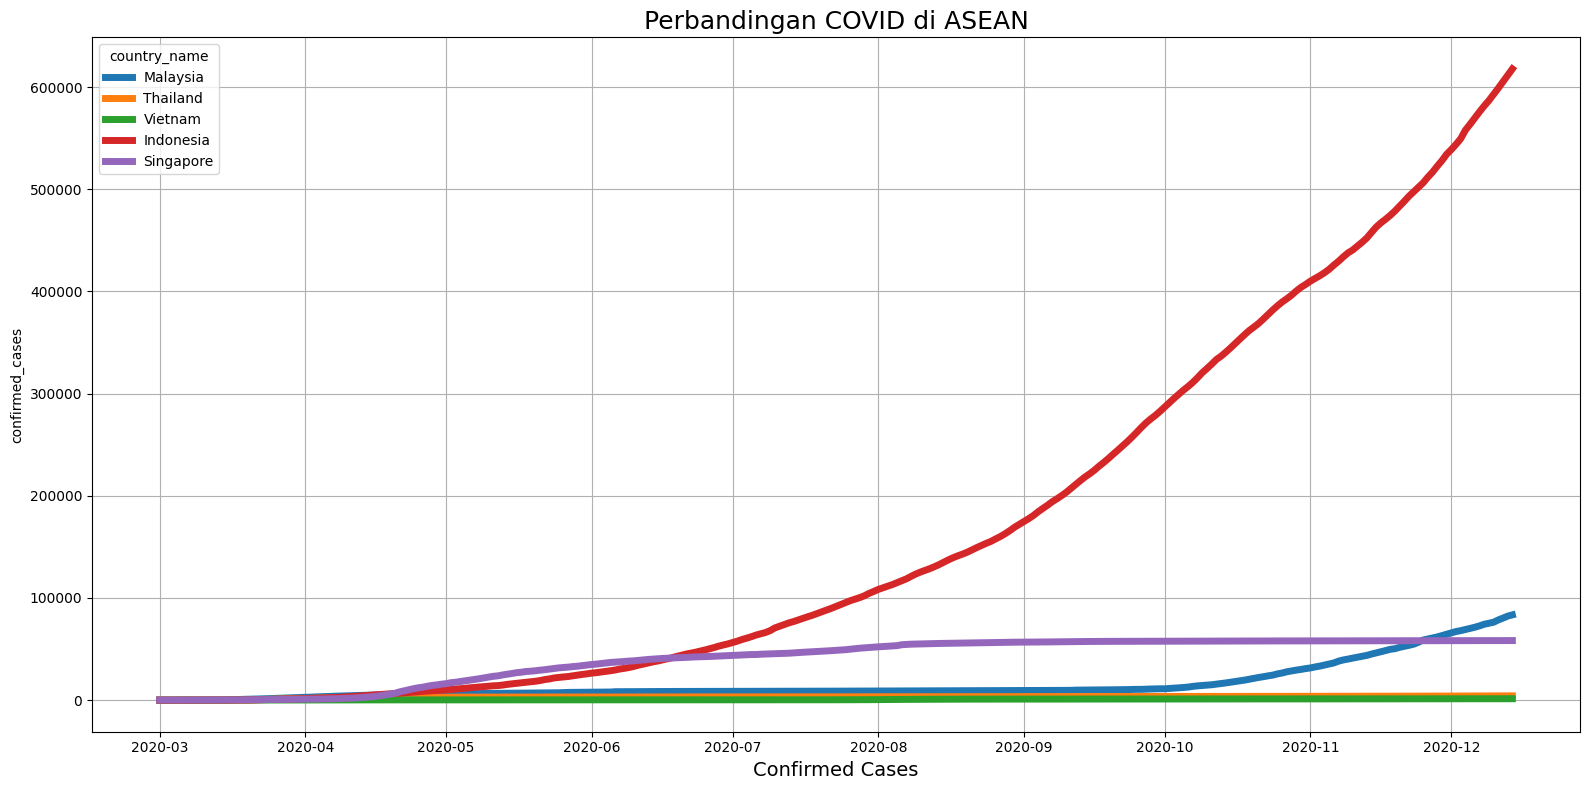

In [242]:
import seaborn as sns

plt.figure(figsize=(16, 8))
sns.lineplot(data=df_covid_dari_maret, x=df_covid_dari_maret.index, y="confirmed_cases", hue="country_name", linewidth=5)
plt.title("Perbandingan COVID di ASEAN", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.xlabel("Confirmed Cases", fontsize=14)
plt.grid()
plt.tight_layout()

plt.show()